In [1]:
from matplotlib import pyplot as plt

In [2]:
import numpy as np

In [3]:
import requests

In [4]:
PLAYERS = {'Antony': 96846, 'Miguel': 110988,
           'Manesh': 113418, 'Zeeshan': 112909, 'Llukman': 102751,
           'Asa': 97933, 'Jimmy': 97201, 'Michael': 110033}

In [5]:
PLAYERS_LG2 = {'Antony': 56349, 'Marcus': 39626}

---

In [9]:
miguel_data = requests.get(
    f"https://draft.premierleague.com/api/entry/{PLAYERS['Miguel']}/history")

In [10]:
ant_data = requests.get(
    f"https://draft.premierleague.com/api/entry/{PLAYERS['Antony']}/history")

In [11]:
miguel = miguel_data.json()

In [12]:
antony = ant_data.json()

In [13]:
for  points in data['history']:
    print (points['points'])

NameError: name 'data' is not defined

In [14]:
def get_points_per_gameweek(src):
#     res = []
#     for points in src['history']:
#         res.append(points['points'])
#     return res
    return [points['points'] for points in src['history']]
    
    

In [15]:
mig_gameweek_points = get_points_per_gameweek(miguel)

In [16]:
ant_gameweek_points = get_points_per_gameweek(antony)

In [17]:
gameweeks = list(range(1, len(mig_gameweek_points) + 1))

In [19]:
%matplotlib widget
plt.plot(gameweeks, mig_gameweek_points)
plt.plot(gameweeks, ant_gameweek_points)
plt.title('Ant vs Mig')
plt.xlabel('gameweeks')
plt.ylabel('points')
plt.legend(['Miguel', 'Antony'])
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

---

In [14]:


class DraftData():

    def __init__(self, player_ids):
        self.player_ids = player_ids

    def get_player_ids(self):
        ids = requests.get("https://draft.premierleague.com/api/league/11321/details")
        player_ids = ids.json()
        return player_ids
    

    def get_data(self, player_name):
        # make line fit
        player = requests.get(
            f"https://draft.premierleague.com/api/entry/{self.player_ids[player_name]}/history"
        )
        player_data = player.json()
        return player_data

    def get_points_per_gameweek(self, src):
        return [points['points'] for points in src['history']]

#     def get_gameweeks(self, src):
#         return list(range(1, len(src) + 1))


#     def get_gameweeks_points(self, player_name):
#         data = self.get_data(player_name)
#         points = self.get_points_per_gameweek(data)
#         return {player_name: dict(enumerate(points, start=1))}

#     one-liner
#     def get_gameweeks_points(self, *players):
#         return {player_name: dict(enumerate(self.get_points_per_gameweek(self.get_data(player_name)), start=1)) for player_name in players}
    
#     def get_gameweeks_points(self, *players):
#         result = dict()
#         for player_name in players:
#             data = self.get_data(player_name)
#             points = self.get_points_per_gameweek(data)
#             result[player_name] = dict(enumerate(points, start=1))
#         return result
    
    def get_gameweeks_points(self, *players, format_type="dict"):
        """
        returns a dict of players and their gameweek score points.
        specify format_type (by default a dictionary) of either
        a list or dictionary to change the gameweek points as either a dictionary
        of gameweek number and points or a list of just the points.
        """
        result = dict()
        print(players)
        for player_name in players:
            print(player_name)
            data = self.get_data(player_name)
            points = self.get_points_per_gameweek(data)
            if format_type == "dict":
                result[player_name] = dict(enumerate(points, start=1))
            elif format_type == "list":
                result[player_name] = list(points)
        return result
            
    
    def get_all_player_points(self, format_type="dict"):
        """
        returns a dict of ALL players and their gameweek score points.
        specify format_type (by default a dictionary) of either
        a list or dictionary to change the gameweek points as either a dictionary
        of gameweek number and points or a list of just the points.
        """
        result = dict()
        print(self.player_ids)
        for player_name in list(self.player_ids):
            print(player_name)
            data = self.get_data(player_name)
            points = self.get_points_per_gameweek(data)
            if format_type == "dict":
                result[player_name] = dict(enumerate(points, start=1))
            elif format_type == "list":
                result[player_name] = list(points)
        return result
            
            


class HeadToHead(DraftData):

    def __init__(self, player_ids, player1, player2):
        super().__init__(player_ids)
        self.player1 = player1
        self.player2 = player2
        self.players_scores = self.get_gameweeks_points(self.player1, self.player2)
#         self.p1_points = self.get_gameweeks_points(self.player1)
#         self.p2_points = self.get_gameweeks_points(self.player2)
        print(self.players_scores)
    
    def get_id(self, player_name):
        return self.player_ids[player_name]
    
        
    def plot_linechart(self):
        """
        plots the points and gameweeks for both players on a line chart
        and returns the chart
        """
        plt.style.use('ggplot')
        
        plt.minorticks_on()
        
        plt.plot(self.players_scores[self.player1].keys(), self.players_scores[self.player1].values())
        plt.plot(self.players_scores[self.player2].keys(), self.players_scores[self.player2].values())
        
        plt.xlabel('gameweeks')
        plt.ylabel('points')
        plt.legend([self.player1, self.player2])
        
        plt.show()
     
    def headtohead_score(self):
        """
        Compares the scores of each gameweek if players went head to head and returns
        a dict of how many wins each and draws (if any).
        
        """
        p1_win = 0
        p2_win = 0
        draw = 0
        for score in list(zip(self.players_scores[self.player1].values(), self.players_scores[self.player2].values())):
            if score[0] > score[1]:
                p1_win += 1
            elif score[1] > score[0]:
                p2_win += 1
            elif score[0] == score[1]:
                draw += 1
        return {self.player1: p1_win, self.player2: p2_win, "draw": draw}
    
    def plot_barchart(self):
        """
        Plots points and gameweeks for both players as a bar chart and returns
        bar chart with the total head to head score. 
        
        """
        
        labels = list(self.players_scores[self.player1].keys())
        

        x = np.arange(len(labels))  # the label locations
        width = 0.4  # the width of the bars

        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width / 2, self.players_scores[self.player1].values(), width, label=self.player1)
        rects2 = ax.bar(x + width / 2, self.players_scores[self.player2].values(), width, label=self.player2)

        ax.set_ylabel('Points')
        ax.set_title('Head to Head By Gameweek')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()

        bbox_args = dict(boxstyle="round", fc="0.8")

#         ax.annotate(f'{self.player1}: {self.headtohead_score()[self.player1]}\n{self.player2}: {self.headtohead_score()[self.player2]}\n draw: {self.headtohead_score()["draw"]}', xy=(1, 1), xycoords='figure fraction',
#                      xytext=(-20, -20), textcoords='offset points',
#                      ha="right", va="top",
#                      bbox=bbox_args,

        ax.annotate(
            f'{self.player1}: {self.headtohead_score()[self.player1]}\n \
            {self.player2}: {self.headtohead_score()[self.player2]}\n \
            draw: {self.headtohead_score()["draw"]}',
            xy=(1, 1), xycoords='figure fraction',
            xytext=(-20, -20), textcoords='offset points',
            ha="right", va="top",
            bbox=bbox_args,
        )

        def autolabel(rects):
            """Attach a text label above each bar in *rects*, displaying its height."""
            for rect in rects:
                height = rect.get_height()
                ax.annotate('{}'.format(height),
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom')


        autolabel(rects1)
        autolabel(rects2)

        fig.tight_layout()

        plt.show()
        
#------------------------------------------------------------------------------
class LeagueStats(DraftData):
    
    
    def __init__(self, player_ids):
        super().__init__(player_ids)
        self.all_player_scores = self.get_all_player_points(format_type='list')
        print(self.all_player_scores)
        
    def calc_average(self, lst):
        return sum(lst) // len(lst)
    
    def get_lowest_gameweek_scores(self):
        """ returns lowest gameweek score of all players"""
        return {
            player: min(self.all_player_scores[player])\
            for player in self.all_player_scores
        }
    
    def get_highest_gameweek_score(self):
        """ returns highest gameweek score of all players"""
        return {player: max(self.all_player_scores[player]) for player in self.all_player_scores}
    
    def get_average_gameweek_score(self):
        """ returns average gameweek score of all players"""
        return {player: self.calc_average(self.all_player_scores[player]) for player in self.all_player_scores}
        
    
    def plot_boxplot(self):
        pass
    
    def plot_averages_barchart(self):
        pass



In [15]:
h = HeadToHead(PLAYERS, 'Antony', 'Miguel')

('Antony', 'Miguel')
Antony
Miguel
{'Antony': {1: 43, 2: 38, 3: 47, 4: 43, 5: 24, 6: 48, 7: 49, 8: 29, 9: 42, 10: 32, 11: 49, 12: 39, 13: 40, 14: 45, 15: 30, 16: 61, 17: 57, 18: 17, 19: 107, 20: 36, 21: 41, 22: 44, 23: 46, 24: 55, 25: 63, 26: 66, 27: 34, 28: 44, 29: 20}, 'Miguel': {1: 74, 2: 86, 3: 42, 4: 67, 5: 46, 6: 52, 7: 69, 8: 43, 9: 64, 10: 54, 11: 60, 12: 36, 13: 49, 14: 64, 15: 33, 16: 34, 17: 36, 18: 26, 19: 99, 20: 50, 21: 47, 22: 55, 23: 56, 24: 71, 25: 55, 26: 55, 27: 34, 28: 77, 29: 4}}


In [11]:
l.get_lowest_gameweek_scores()

{'Antony': 17,
 'Miguel': 4,
 'Manesh': 15,
 'Zeeshan': 6,
 'Llukman': 9,
 'Asa': 19,
 'Jimmy': 21,
 'Michael': 19}

In [6]:
i = DraftData()

In [8]:
deets = i.get_player_ids()

In [17]:
for player in deets['league_entries']:
    print({player['player_first_name']:player['entry_id']})

{'Akin': 39483}
{'Marcus': 39626}
{'Jonathan': 46176}
{'Daniel': 50195}
{'Michael': 55630}
{'Emily': 55764}
{'Antony': 56349}
{'X': 58108}


In [ ]:
for players in deets

In [8]:
a = LeagueStats(PLAYERS)

TypeError: object.__init__() takes exactly one argument (the instance to initialize)

In [59]:
a.get_lowest_gameweek_scores()

{'Antony': 17,
 'Miguel': 4,
 'Manesh': 15,
 'Zeeshan': 6,
 'Llukman': 9,
 'Asa': 19,
 'Jimmy': 21,
 'Michael': 19}

In [60]:
a.get_highest_gameweek_score()

{'Antony': 107,
 'Miguel': 99,
 'Manesh': 80,
 'Zeeshan': 75,
 'Llukman': 87,
 'Asa': 74,
 'Jimmy': 88,
 'Michael': 80}

In [61]:
a.get_average_gameweek_score()

{'Antony': 44,
 'Miguel': 53,
 'Manesh': 43,
 'Zeeshan': 42,
 'Llukman': 44,
 'Asa': 40,
 'Jimmy': 43,
 'Michael': 40}

In [15]:
d = DraftData(PLAYERS)

In [41]:
p = HeadToHead(PLAYERS, 'Antony', 'Miguel')

('Antony', 'Miguel')
Antony
Miguel
{'Antony': {1: 43, 2: 38, 3: 47, 4: 43, 5: 24, 6: 48, 7: 49, 8: 29, 9: 42, 10: 32, 11: 49, 12: 39, 13: 40, 14: 45, 15: 30, 16: 61, 17: 57, 18: 17, 19: 107, 20: 36, 21: 41, 22: 44, 23: 46, 24: 55, 25: 63, 26: 66, 27: 34, 28: 44, 29: 20}, 'Miguel': {1: 74, 2: 86, 3: 42, 4: 67, 5: 46, 6: 52, 7: 69, 8: 43, 9: 64, 10: 54, 11: 60, 12: 36, 13: 49, 14: 64, 15: 33, 16: 34, 17: 36, 18: 26, 19: 99, 20: 50, 21: 47, 22: 55, 23: 56, 24: 71, 25: 55, 26: 55, 27: 34, 28: 77, 29: 4}}


In [42]:
p.headtohead_score()

{'Antony': 8, 'Miguel': 20, 'draw': 1}

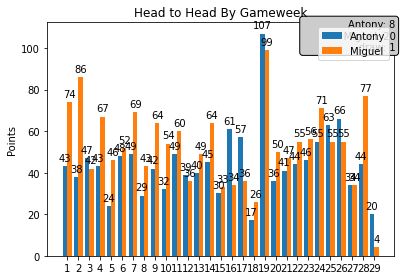

In [43]:
p.plot_barchart()

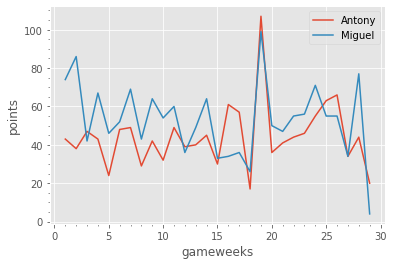

In [44]:
p.plot_linechart()

---

In [10]:
a = h.get_gameweeks_points('Antony')

In [13]:
a['Antony'].values()

dict_values([43, 38, 47, 43, 24, 48, 49, 29, 42, 32, 49, 39, 40, 45, 30, 61, 57, 17, 107, 36, 41, 44, 46, 55, 63, 66])

In [59]:
a.values()

dict_values([43, 38, 47, 43, 24, 48, 49, 29, 42, 32, 49, 39, 40, 45, 30, 61, 57, 17, 107, 36, 41, 44, 46, 55, 63])

In [54]:
m = h.get_gameweeks_points('Miguel')

In [57]:
m.values()

dict_values([74, 86, 42, 67, 46, 52, 69, 43, 64, 54, 60, 36, 49, 64, 33, 34, 36, 26, 99, 50, 47, 55, 56, 71, 55])

In [8]:
m2 = [74, 86, 42, 67, 46, 52, 69, 43, 64, 54, 60, 36, 49, 64, 33, 34, 36, 26, 99, 50, 47, 55, 56, 71, 55]

In [7]:
a2 = [43, 38, 47, 43, 24, 48, 49, 29, 42, 32, 49, 39, 40, 45, 30, 61, 57, 17, 107, 36, 41, 44, 46, 55, 63]

In [9]:
m3 = [74, 86, 42, 67, 46]

In [10]:
a3 = [74, 38, 47, 43, 24]

In [11]:
m4 = dict(enumerate(m3, start=1))

In [12]:
a4 = dict(enumerate(a3, start=1))

In [24]:
m4, a4

({1: 74, 2: 86, 3: 42, 4: 67, 5: 46}, {1: 74, 2: 38, 3: 47, 4: 43, 5: 24})

In [29]:
list(zip(a4.values(), m4.values()))

[(74, 74), (38, 86), (47, 42), (43, 67), (24, 46)]

In [93]:
list(a4.keys())

[1, 2, 3, 4, 5]

In [68]:
sum(m2) // len(m2)

54

In [13]:
def headtohead_score(p1, p2):   
    a_win = 0
    m_win = 0
    draw = 0
    for item in list(zip(p1.values(), p2.values())):
        if item[0] > item[1]:
            a_win += 1
        elif item[1] > item[0]:
            m_win += 1
        elif item[0] == item[1]:
            draw += 1
    return {"a": a_win, "m": m_win, "draw": draw}

In [14]:
h2h = headtohead_score(a4, m4)

In [49]:
h2h['a']

1

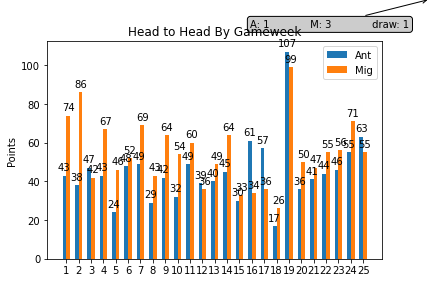

In [20]:
labels = list(range(1, len(a2) + 1))

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, a2, width, label='Ant')
rects2 = ax.bar(x + width / 2, m2, width, label='Mig')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Points')
ax.set_title('Head to Head By Gameweek')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")

# ax.annotate(f'Zeeshan 12\nLlukman 13\ndraw 1', xy=(1, 1), xycoords='figure fraction',
#              xytext=(-20, -20), textcoords='offset points',
#              ha="right", va="top",
#              bbox=bbox_args,
#              arrowprops=arrow_args)

ax.annotate(f'A: {h2h["a"]}\n \
            M: {h2h["m"]}\n \
            draw: {h2h["draw"]}',
            xy=(1, 1), xycoords='figure fraction',
            xytext=(-20, -20), textcoords='offset points',
            ha="right", va="top",
            bbox=bbox_args,
            arrowprops=arrow_args
           )


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)


plt.show()

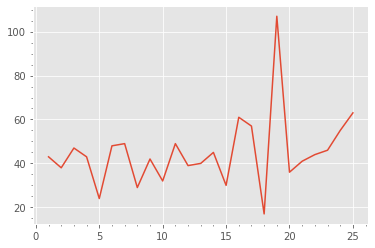

In [30]:
plt.plot(p.keys(), p.values())
plt.minorticks_on()
plt.show()

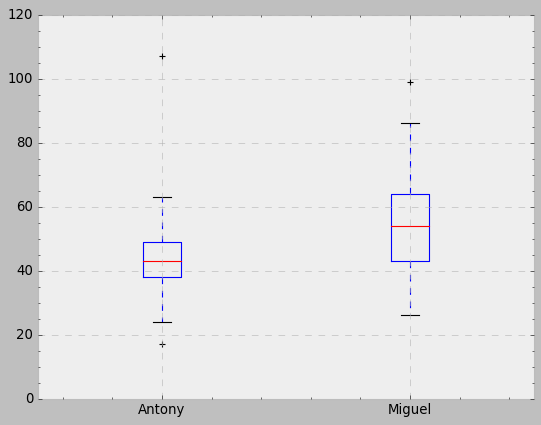

In [94]:
plt.style.use('bmh')
plt.minorticks_on()
plt.boxplot([a2, m2], labels=['Antony', 'Miguel'])
plt.show()

In [72]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [66]:
points = [43,38,47,43,24,48,49]

In [71]:
d = DraftData(PLAYERS)

In [43]:
{name: dict(enumerate(nums))}

{'Ant': {0: 1, 1: 2, 2: 3, 3: 4}}

In [56]:
all_player_points = list(map(d.get_gameweeks_points, PLAYERS.keys()))

In [63]:
all_player_points[0]['Antony'].values()

dict_values([43, 38, 47, 43, 24, 48, 49, 29, 42, 32, 49, 39, 40, 45, 30, 61, 57, 17, 107, 36, 41, 44, 46, 55, 63, 47])

In [64]:
all_player_points

[{'Antony': {1: 43,
   2: 38,
   3: 47,
   4: 43,
   5: 24,
   6: 48,
   7: 49,
   8: 29,
   9: 42,
   10: 32,
   11: 49,
   12: 39,
   13: 40,
   14: 45,
   15: 30,
   16: 61,
   17: 57,
   18: 17,
   19: 107,
   20: 36,
   21: 41,
   22: 44,
   23: 46,
   24: 55,
   25: 63,
   26: 47}},
 {'Miguel': {1: 74,
   2: 86,
   3: 42,
   4: 67,
   5: 46,
   6: 52,
   7: 69,
   8: 43,
   9: 64,
   10: 54,
   11: 60,
   12: 36,
   13: 49,
   14: 64,
   15: 33,
   16: 34,
   17: 36,
   18: 26,
   19: 99,
   20: 50,
   21: 47,
   22: 55,
   23: 56,
   24: 71,
   25: 55,
   26: 45}},
 {'Manesh': {1: 40,
   2: 55,
   3: 27,
   4: 80,
   5: 49,
   6: 45,
   7: 67,
   8: 45,
   9: 39,
   10: 32,
   11: 57,
   12: 43,
   13: 21,
   14: 51,
   15: 24,
   16: 16,
   17: 39,
   18: 32,
   19: 69,
   20: 37,
   21: 33,
   22: 55,
   23: 49,
   24: 28,
   25: 34,
   26: 55}},
 {'Zeeshan': {1: 26,
   2: 26,
   3: 50,
   4: 24,
   5: 54,
   6: 26,
   7: 30,
   8: 47,
   9: 45,
   10: 35,
   11: 34,
   12: 43

In [34]:
def mult_2(*n):
    return [num * 2 for num in n]

In [35]:
mult_2(10, 20, 30)

[20, 40, 60]

In [36]:
tuple(PLAYERS)

('Antony', 'Miguel', 'Manesh', 'Zeeshan', 'Llukman', 'Asa', 'Jimmy', 'Michael')

In [11]:
players_points = [
    {"Antony": {
            1: 43,
            2: 38,
            3: 47,
            4: 43,
            5: 24,
            6: 48,
            7: 49,
            8: 29,
            9: 42,
            10: 32,
            11: 49,
            12: 39,
            13: 40,
            14: 45,
            15: 30,
            16: 61,
            17: 57,
            18: 17,
            19: 107,
            20: 36,
            21: 41,
            22: 44,
            23: 46,
            24: 55,
            25: 63,
            26: 47
        }
    },
    {"Miguel": {
            1: 74,
            2: 86,
            3: 42,
            4: 67,
            5: 46,
            6: 52,
            7: 69,
            8: 43,
            9: 64,
            10: 54,
            11: 60,
            12: 36,
            13: 49,
            14: 64,
            15: 33,
            16: 34,
            17: 36,
            18: 26,
            19: 99,
            20: 50,
            21: 47,
            22: 55,
            23: 56,
            24: 71,
            25: 55,
            26: 45
        }
    },
    {"Manesh": {
            1: 40,
            2: 55,
            3: 27,
            4: 80,
            5: 49,
            6: 45,
            7: 67,
            8: 45,
            9: 39,
            10: 32,
            11: 57,
            12: 43,
            13: 21,
            14: 51,
            15: 24,
            16: 16,
            17: 39,
            18: 32,
            19: 69,
            20: 37,
            21: 33,
            22: 55,
            23: 49,
            24: 28,
            25: 34,
            26: 55
        }
    },
    {"Zeeshan": {
            1: 26,
            2: 26,
            3: 50,
            4: 24,
            5: 54,
            6: 26,
            7: 30,
            8: 47,
            9: 45,
            10: 35,
            11: 34,
            12: 43,
            13: 36,
            14: 44,
            15: 59,
            16: 39,
            17: 44,
            18: 31,
            19: 75,
            20: 43,
            21: 52,
            22: 61,
            23: 43,
            24: 64,
            25: 56,
            26: 49
        }
    },
    {"Llukman": {
            1: 29,
            2: 87,
            3: 41,
            4: 9,
            5: 21,
            6: 55,
            7: 51,
            8: 58,
            9: 48,
            10: 54,
            11: 46,
            12: 34,
            13: 38,
            14: 47,
            15: 38,
            16: 42,
            17: 64,
            18: 22,
            19: 72,
            20: 43,
            21: 47,
            22: 38,
            23: 40,
            24: 50,
            25: 36,
            26: 54
        }
    },
    {"Asa": {
            1: 40,
            2: 25,
            3: 51,
            4: 23,
            5: 47,
            6: 40,
            7: 62,
            8: 37,
            9: 34,
            10: 44,
            11: 37,
            12: 53,
            13: 24,
            14: 40,
            15: 36,
            16: 19,
            17: 39,
            18: 20,
            19: 74,
            20: 33,
            21: 48,
            22: 25,
            23: 41,
            24: 55,
            25: 33,
            26: 58
        }
    },
    {"Jimmy": {
            1: 30,
            2: 31,
            3: 21,
            4: 39,
            5: 52,
            6: 42,
            7: 54,
            8: 44,
            9: 42,
            10: 35,
            11: 30,
            12: 29,
            13: 27,
            14: 43,
            15: 36,
            16: 36,
            17: 36,
            18: 31,
            19: 88,
            20: 54,
            21: 29,
            22: 51,
            23: 74,
            24: 75,
            25: 41,
            26: 51
        }
    },
    {"Michael": {
            1: 19,
            2: 53,
            3: 47,
            4: 29,
            5: 26,
            6: 39,
            7: 28,
            8: 35,
            9: 51,
            10: 41,
            11: 26,
            12: 37,
            13: 35,
            14: 26,
            15: 45,
            16: 45,
            17: 47,
            18: 25,
            19: 58,
            20: 61,
            21: 29,
            22: 21,
            23: 43,
            24: 57,
            25: 44,
            26: 56
        }
    }
]


In [66]:
res = dict()
for player in players_points:
    print (player.values())

dict_values([{1: 43, 2: 38, 3: 47, 4: 43, 5: 24, 6: 48, 7: 49, 8: 29, 9: 42, 10: 32, 11: 49, 12: 39, 13: 40, 14: 45, 15: 30, 16: 61, 17: 57, 18: 17, 19: 107, 20: 36, 21: 41, 22: 44, 23: 46, 24: 55, 25: 63, 26: 47}])
dict_values([{1: 74, 2: 86, 3: 42, 4: 67, 5: 46, 6: 52, 7: 69, 8: 43, 9: 64, 10: 54, 11: 60, 12: 36, 13: 49, 14: 64, 15: 33, 16: 34, 17: 36, 18: 26, 19: 99, 20: 50, 21: 47, 22: 55, 23: 56, 24: 71, 25: 55, 26: 45}])
dict_values([{1: 40, 2: 55, 3: 27, 4: 80, 5: 49, 6: 45, 7: 67, 8: 45, 9: 39, 10: 32, 11: 57, 12: 43, 13: 21, 14: 51, 15: 24, 16: 16, 17: 39, 18: 32, 19: 69, 20: 37, 21: 33, 22: 55, 23: 49, 24: 28, 25: 34, 26: 55}])
dict_values([{1: 26, 2: 26, 3: 50, 4: 24, 5: 54, 6: 26, 7: 30, 8: 47, 9: 45, 10: 35, 11: 34, 12: 43, 13: 36, 14: 44, 15: 59, 16: 39, 17: 44, 18: 31, 19: 75, 20: 43, 21: 52, 22: 61, 23: 43, 24: 64, 25: 56, 26: 49}])
dict_values([{1: 29, 2: 87, 3: 41, 4: 9, 5: 21, 6: 55, 7: 51, 8: 58, 9: 48, 10: 54, 11: 46, 12: 34, 13: 38, 14: 47, 15: 38, 16: 42, 17: 64,

In [54]:
from itertools import chain, 

In [55]:
list(chain.from_iterable(players_points))

['Antony', 'Miguel', 'Manesh', 'Zeeshan', 'Llukman', 'Asa', 'Jimmy', 'Michael']

In [70]:
p = {'Antony': [43, 38, 47, 43, 24, 48, 49, 29, 42, 32, 49, 39, 40, 45, 30, 61, 57, 17, 107, 36, 41, 44, 46, 55, 63, 66, 34, 44, 20]}

#result

{name: avg_score, 'alan':50, 'bob': 45}

In [17]:
players_points_list = {'Antony': [43,
  38,
  47,
  43,
  24,
  48,
  49,
  29,
  42,
  32,
  49,
  39,
  40,
  45,
  30,
  61,
  57,
  17,
  107,
  36,
  41,
  44,
  46,
  55,
  63,
  66,
  34,
  44,
  20],
 'Miguel': [74,
  86,
  42,
  67,
  46,
  52,
  69,
  43,
  64,
  54,
  60,
  36,
  49,
  64,
  33,
  34,
  36,
  26,
  99,
  50,
  47,
  55,
  56,
  71,
  55,
  55,
  34,
  77,
  4],
 'Manesh': [40,
  55,
  27,
  80,
  49,
  45,
  67,
  45,
  39,
  32,
  57,
  43,
  21,
  51,
  24,
  16,
  39,
  32,
  69,
  37,
  33,
  55,
  49,
  28,
  34,
  73,
  58,
  38,
  15],
 'Zeeshan': [26,
  26,
  50,
  24,
  54,
  26,
  30,
  47,
  45,
  35,
  34,
  43,
  36,
  44,
  59,
  39,
  44,
  31,
  75,
  43,
  52,
  61,
  43,
  64,
  56,
  63,
  51,
  33,
  6],
 'Llukman': [29,
  87,
  41,
  9,
  21,
  55,
  51,
  58,
  48,
  54,
  46,
  34,
  38,
  47,
  38,
  42,
  64,
  22,
  72,
  43,
  47,
  38,
  40,
  50,
  36,
  82,
  58,
  34,
  20],
 'Asa': [40,
  25,
  51,
  23,
  47,
  40,
  62,
  37,
  34,
  44,
  37,
  53,
  24,
  40,
  36,
  19,
  39,
  20,
  74,
  33,
  48,
  25,
  41,
  55,
  33,
  58,
  46,
  41,
  38],


In [26]:
for player in players_points_list:
    print (max(players_points_list[player]))

107
99
80
75
87
74
88
l


In [64]:
a = DraftData(PLAYERS)

In [65]:
raw = a.get_gameweeks_points(('Antony', 'Miguel', 'Manesh', 'Zeeshan', 'Llukman', 'Asa', 'Jimmy', 'Michael'), format_type='list')

(('Antony', 'Miguel', 'Manesh', 'Zeeshan', 'Llukman', 'Asa', 'Jimmy', 'Michael'),)
('Antony', 'Miguel', 'Manesh', 'Zeeshan', 'Llukman', 'Asa', 'Jimmy', 'Michael')


KeyError: ('Antony', 'Miguel', 'Manesh', 'Zeeshan', 'Llukman', 'Asa', 'Jimmy', 'Michael')

In [49]:
raw

{'Antony': [43,
  38,
  47,
  43,
  24,
  48,
  49,
  29,
  42,
  32,
  49,
  39,
  40,
  45,
  30,
  61,
  57,
  17,
  107,
  36,
  41,
  44,
  46,
  55,
  63,
  66,
  34,
  44,
  20],
 'Miguel': [74,
  86,
  42,
  67,
  46,
  52,
  69,
  43,
  64,
  54,
  60,
  36,
  49,
  64,
  33,
  34,
  36,
  26,
  99,
  50,
  47,
  55,
  56,
  71,
  55,
  55,
  34,
  77,
  4],
 'Manesh': [40,
  55,
  27,
  80,
  49,
  45,
  67,
  45,
  39,
  32,
  57,
  43,
  21,
  51,
  24,
  16,
  39,
  32,
  69,
  37,
  33,
  55,
  49,
  28,
  34,
  73,
  58,
  38,
  15],
 'Zeeshan': [26,
  26,
  50,
  24,
  54,
  26,
  30,
  47,
  45,
  35,
  34,
  43,
  36,
  44,
  59,
  39,
  44,
  31,
  75,
  43,
  52,
  61,
  43,
  64,
  56,
  63,
  51,
  33,
  6],
 'Llukman': [29,
  87,
  41,
  9,
  21,
  55,
  51,
  58,
  48,
  54,
  46,
  34,
  38,
  47,
  38,
  42,
  64,
  22,
  72,
  43,
  47,
  38,
  40,
  50,
  36,
  82,
  58,
  34,
  20],
 'Asa': [40,
  25,
  51,
  23,
  47,
  40,
  62,
  37,
  34,
  44,
  37,
  

In [52]:
def point_average(lst):
    return sum(lst) // len(lst)

In [63]:
for player in raw:
    print ({player: point_average(raw[player])})

NameError: name 'raw' is not defined

In [56]:
tuple(PLAYERS)

('Antony', 'Miguel', 'Manesh', 'Zeeshan', 'Llukman', 'Asa', 'Jimmy', 'Michael')